# <font color=red>Mini project </font>

# 1.Choose a dataset


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [66]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [67]:
df.shape

(1025, 14)

In [68]:
cleandata = df.drop_duplicates()
cleandata.shape

(302, 14)

#### ניתן לראות כי במאגר הנתונים המקורי היו מעל 700 שורות כפולות. בגלל שמדובר במספר גבוה מאוד של רשומות, החלטנו שלא מדובר במקריות אלא בטעות ולכן בחרנו להוריד כפילויות ומעתה והלאה לעבוד רק עם רשומות ייחודיות  

In [69]:
cleandata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# a.
#### הנושא שבחרנו הוא מחלות לב

# b.
#### כל שורה בטבלת הנתונים שלנו מייצגת בן אדם ומספר נתונים עליו, כמו מדדים שונים, מין, גיל והאם יש לו מחלת לב או לא.
#### מערך הנתונים הוא משנת 1988 ומורכב מ-4 מאגרי נתונים - קליבלנד,הונגריה,שוויץ ולונג ביץ'-וי.
#### ישנם 14 פיצ'רים (מופיעים מטה),כאשר שדה היעד מתייחס לנוכחות מחלות לב אצל מטופל.
#### הערך 0 - מייצג שאין מחלות לב.
#### הערך 1- מייצג שיש מחלות לב

# c.
#### רשימת פיצ'רים

</ol>
<li>age- גיל בשנים, משתנה נומרי </li>
<li>sex- מגדר, משתנה קטגוריאלי</li>
<li>cp-סוג כאב בחזה, משתנה קטגוריאלי</li>
<li>trestbps-לחץ דם, משתנה נומרי</li>
<li>chol-מד כולסטרול, משתנה נומרי</li>
<li>fbs-רמת סוכר בדם הגדולה מ120, משתנה קטגוריאלי</li>
<li>restecg-תוצאות אלקטרוקרדיוגרפיות במנוחה, משתנה קטגוריאלי</li>
<li>thalach-קצב לב מקסימלי, משתנה נומרי</li>
<li>exang-פעילות גופנית הגורמת 
לכאבים בחזה, משתנה נומרי</li>
<li>oldpeak- ST depression induced by exercise relative
to rest, משתנה נומרי </li>
<li>slope-השיפוע של קטע השיא, משתנה קטגוריאלי</li>
<li>ca -מספר כלי הדם העיקריים הצבועים בפלורוסופיה, משתנה נומרי</li>
<li>thal -תָּלָסֶמְיָה (מחלת דם תורשתית), משתנה נומרי</li>
<li>target -האם יש מחלת לב או לא , משתנה קטגרויאלי</li>
</ol>



In [70]:
cleandata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


# d.

In [71]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


#  2.Exploratory data analysis

# a.

### המשתנה הראשון שנבדוק הוא לכמה מהנבדקים יש בעיות בלב ולכמה מהנבדקים אין בעיות בלב.
#### נזכיר כי 0 מייצג שאין מחלה לבבית ,והספרה 1 מייצגת שיש מחלה לבבית.


In [72]:
val_off_tar = cleandata.target.value_counts()
val_off_tar

1    164
0    138
Name: target, dtype: int64

#### : נציג את ההשוואה בגרף עמודות

[Text(0, 0, 'Has heart disease'), Text(1, 0, "Doesn't have heart disease")]

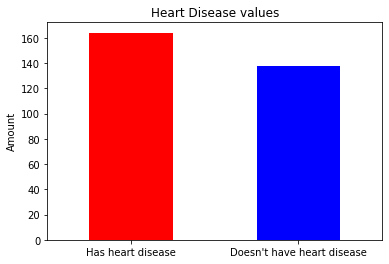

In [73]:
tar_bar =  cleandata.target.value_counts().plot(kind = "bar" ,color = ["red","blue"])
plt.title("Heart Disease values")
plt.ylabel("Amount")
tar_bar.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0)

### המשתנה השני שנבדוק הוא כמה נשים וגברים יש בנתונים שקיבלנו

#### נזכיר כי 0 מייצג נקבה ו-1 מייצג זכר

In [74]:
val_off_sex = cleandata.sex.value_counts()
val_off_sex

1    206
0     96
Name: sex, dtype: int64

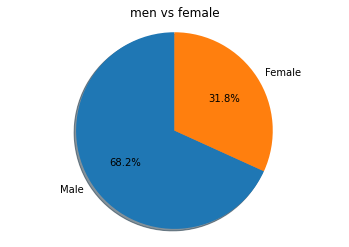

In [75]:
labels = 'Male', 'Female'
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(cleandata.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("men vs female")
ax1.axis('equal')
plt.show()

##### ניתן לראות כי אחוז הגברים הוא כמעט פי 2 מאחוז הנשים המופיעים במאגר הנתונים שלנו.

### המשתנה השלישי שנבדוק הוא את סוגי הכאבים בחזה
#### נזכיר שהוא ממוספר מ 0-3

In [76]:
val_cp = cleandata.cp.value_counts()
val_cp

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

[Text(0, 0, 'pain type 0'),
 Text(1, 0, 'pain type 1'),
 Text(2, 0, 'pain type 2'),
 Text(3, 0, 'pain type 3')]

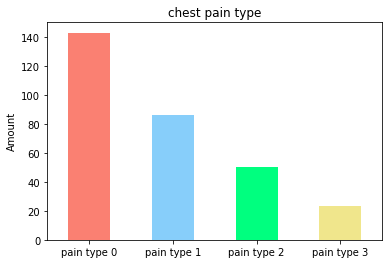

In [77]:
cp_bar = cleandata.cp.value_counts().plot(kind = "bar" ,color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
plt.title("chest pain type")
plt.ylabel("Amount")
cp_bar.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

##### ניתן לראות על פי הגרף כי הכאב השכיח ביותר הוא סוג מספר 0 ,וסוג הכאב הנדיר הוא סוג מספר 3.

### המשתנה הרביעי שנבדוק אלקטרוקארדיוגרף במנוחה - Electrocardiography
#### נזכיר שהוא ממוספר מ 0-2


In [78]:
val_restecg = cleandata.restecg.value_counts()
val_restecg

1    151
0    147
2      4
Name: restecg, dtype: int64

[Text(0, 0, 'type 1'), Text(1, 0, 'type 0'), Text(2, 0, 'type 2')]

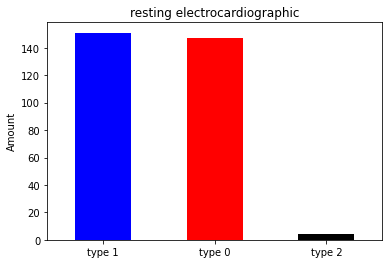

In [79]:
restecg_bar = cleandata.restecg.value_counts().plot(kind = "bar" ,color = ['blue', 'red', 'black'])
plt.title("resting electrocardiographic")
plt.ylabel("Amount")
restecg_bar.set_xticklabels(labels=['type 1', 'type 0', 'type 2'], rotation=0)

##### נסיק כי סוג 2 לא שכיח בהשוואה לסוג 0 ו- 1.

### המשתנה החמישי שנבדוק הוא הגיל

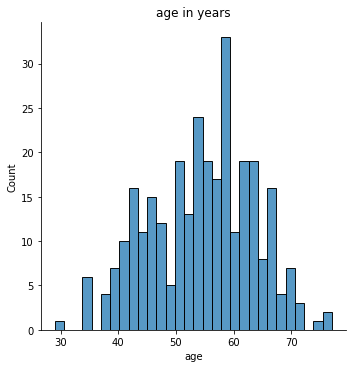

In [80]:
sns.displot( x = 'age', data = cleandata, bins = 30)
plt.title("age in years")
plt.show();

##### נשים לב כי רוב הנתונים במאגר הם על אנשים בגילאי 50-65

### המשתנה השישי שנבדוק הוא מספר כלי הדם הראשיים שנצבעו בפלורוסופ
#### נזכיר כי הוא ממוספר מ 0-4

[Text(0, 0, 'zero vessels'),
 Text(1, 0, 'one vessel'),
 Text(2, 0, 'two vessel'),
 Text(3, 0, 'three vessels'),
 Text(4, 0, 'four vessels')]

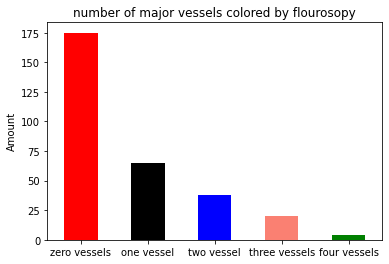

In [81]:
ca_bar = cleandata.ca.value_counts().plot(kind = "bar" ,color = ['red', 'black', 'blue', 'salmon','green'])
plt.title("number of major vessels colored by flourosopy")
plt.ylabel("Amount")
ca_bar.set_xticklabels(labels=['zero vessels', 'one vessel', 'two vessel', 'three vessels','four vessels'], rotation=0)

# b.

##### קטע הקוד הבא מראה את מקדם הקורלציה בין 2 משתנים בעזרת גרף מטריצה .
##### מקדם הקורלציה ששווה ל1 בגרף שלנו נוצר כי הקורלציה של משתנה מסויים עם עצמו היא 1 כמובן.
##### ניתן לראות כי מקדם הקורלציה החזק ביותר ( בין 2 משתנים שונים ) הוא שלילי וערכו המוחלט 0.58 בין המשתנים:
##### oldpeak & slope
##### ניתן לראות כי מקדם הקורלציה הנחלש ביותר הוא שלילי גם כן וערכו המוחלט 0.0089 בין המשתנים:
##### fbs & thalach

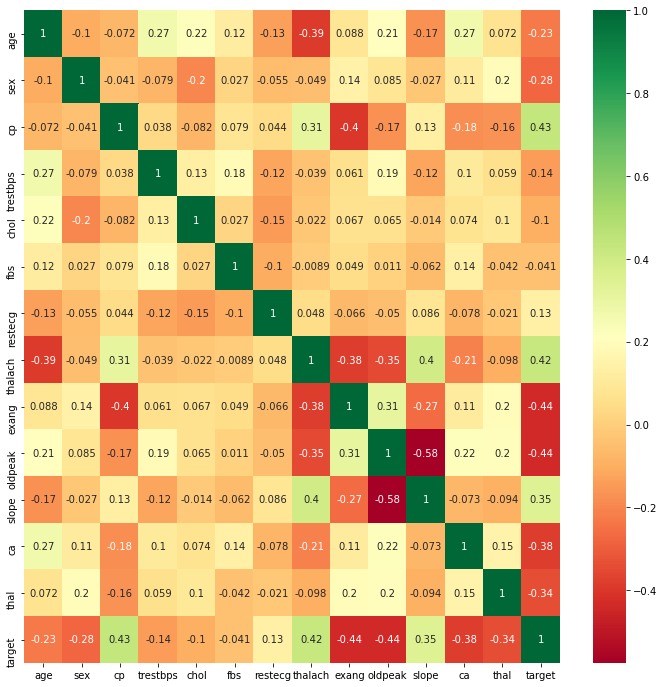

In [82]:
# compute correlation between each pair of variables in data frame
correlations = df.corr()
#plot heat map
plt.figure(figsize=(12,12))
g=sns.heatmap(correlations,annot=True,cmap="RdYlGn")

### נבחן איזה מבני המינים סובל יותר מבעיות בלב
#### 2 pairs of variables - sex and target 

In [83]:
pd.crosstab(cleandata.sex, cleandata.target)

target,0,1
sex,,
0,24,72
1,114,92


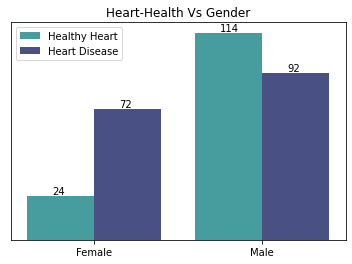

In [84]:
heart_health=[]
for k in cleandata['target']:
    if k == 0:
        heart_health.append('Healthy Heart')
    elif k == 1:
        heart_health.append('Heart Disease')
        
ax = sns.countplot(x='sex',hue=heart_health,data=cleandata, palette='mako_r')

plt.title("Heart-Health Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
ax.set_xticklabels(['Female','Male']);   

#### בסעיף הקודם ראינו שמספר הרשומות של גברים גדול פי 2 משל הנשים. עם זאת, אנחנו גם רואים שמספר החולים בשתי המינים יחסית דומה -סוגייה שקשה להסביר בהינתן סט הנתונים הנל
#### לדענו אין קורלציה בין השניים.

### נבחן מה הקשר בין רמות כאב למחלות לב

#### 2 pairs of variables - cp and target 

In [85]:
pd.crosstab(cleandata.cp, cleandata.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


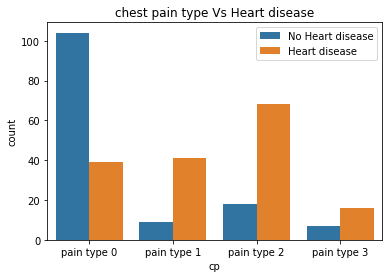

In [86]:
fig_2 = sns.countplot(x = 'cp', data = cleandata, hue = 'target')
fig_2.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.title("chest pain type Vs Heart disease")    
plt.legend(['No Heart disease', 'Heart disease']);

##### אנחנו רואים שתחת סוגי הכאב 1-3 יש סבירות גדולה יותר שמדובר במחלת לב המלווה בכאב מאשר תחת סוג כאב 0 ,דבר שהוא הגיוני כי סוג כאב 0 יכול להיות כאב  שמתפרש אולי ככאב בחזה אך יכול להיות שמדובר בכלל בהתקף חרדה או מאמץ יתר מפעילות גופנית וכו... ולכן לא בהכרח תהיה אינדיקציה למחלה לבבית
##### יש קורלציה חיובית בין 2 המשתנים (לפי הגרף יש קורלציה של 0.43)

### נבחן את הקשר בין כמות כלי הדם הראשיים שנצבעים למחלות לב

#### 2 pairs of variables - ca and target 

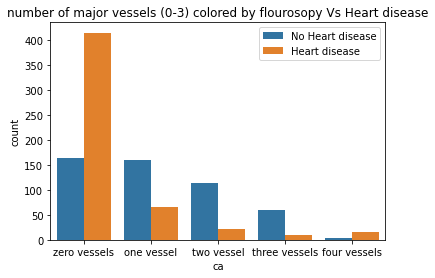

In [87]:
fig_3 = sns.countplot(x = 'ca', data = df, hue = 'target')
fig_3.set_xticklabels(labels=['zero vessels', 'one vessel', 'two vessel', 'three vessels','four vessels'], rotation=0)
plt.title("number of major vessels (0-3) colored by flourosopy Vs Heart disease")    
plt.legend(['No Heart disease', 'Heart disease']);

#### ניתן לשים לב שכאשר מספר כלי הדם הוא 0, יש סבירות גבוה שיש מחלת לב. יש קורלציה בין המשתנים

# 3. Estimation and hypothesis testing

# a

השאלה שבחרנו לחקור היא האם חולי לב נוטים לסבול מרמת כולסטרול גבוהה יותר מאשר אנשים בריאים. בחרנו דווקא בשאלה זו כי שמנו לב שלנבדקים עם מחלות לב יש כולסטרול נמוך יותר מאנשים ללא מחלות לב.

# b

השערת האפס - אין הבדל בין רמת כולסטרול ממוצעת אצל חולי לב לבין רמת כולסטרול ממוצעת אצל אנשים ללא מחלות לב.


השערה אלטרניטיבית - רמת הכולסטרול הממוצעת אצל אדם חולה לב היא נמוכה יותר מאשר אצל אדם בריא 

# c

In [88]:
cleandf = cleandata.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) #chek if there is missing data, and clean it.
cleandf.shape

(302, 14)

לא נמחקו שורות או עמודות, כלומר לא היה מידע חסר ולכן אפשר להמשיך לעבוד עם הדאטה הרגיל

In [89]:
cleandata.groupby('target')['chol'].mean()

target
0    251.086957
1    242.640244
Name: chol, dtype: float64

In [90]:
def diff_of_avgs(df, column_name, groupby_var):
    grpby_var = df.groupby(groupby_var)
    avgs = grpby_var[column_name].mean()
    return avgs[1] - avgs[0]  # avgs is a Series object

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
      original_sample: df containing the original sample
      column_name: name of column containing the variable to average
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

In [101]:
chol_diffs_clean = bootstrap_mean_difference(cleandata, 'chol', 'target',  10000)

lower value:  -19.856709861629696
upper value:  3.2569491525423757


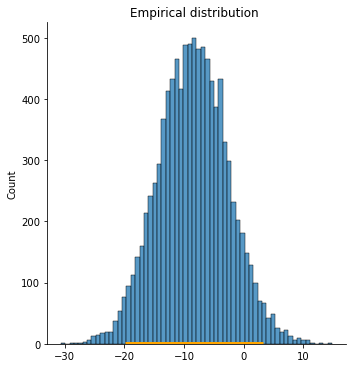

In [102]:
left_end = np.percentile(chol_diffs_clean, 2.5, interpolation='higher')
right_end = np.percentile(chol_diffs_clean, 97.5, interpolation='higher')
print('lower value: ', left_end)
print('upper value: ', right_end)

# visualize results
facetgrid_obj = sns.displot(chol_diffs_clean);
plt.title('Empirical distribution ')
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5);

### נבחין כי 0 לא נמצא ברווח סמך שלנו, לכן ניתן לדחות את השערת האפס

# 4. Prediction or Clustering

# a
#### בחרנו לנסות לסווג את הנתונים שלנו לפי חולי לב או אנשים בריאים משום שלדעתנו יש לנושא הזה משקל רב בשיפור תוחלת החיים של בני אדם. לאלגוריתם זה יכול להיות פוטנציאל לבדיקת קיומן של מחלות לב אצל נבדקים על סמך מדדי הבדיקות שלהם ולמשל לשמש בתי חולים ומכונים כשלב מקדים באבחון מחלת לב  וטיפולה.

# b

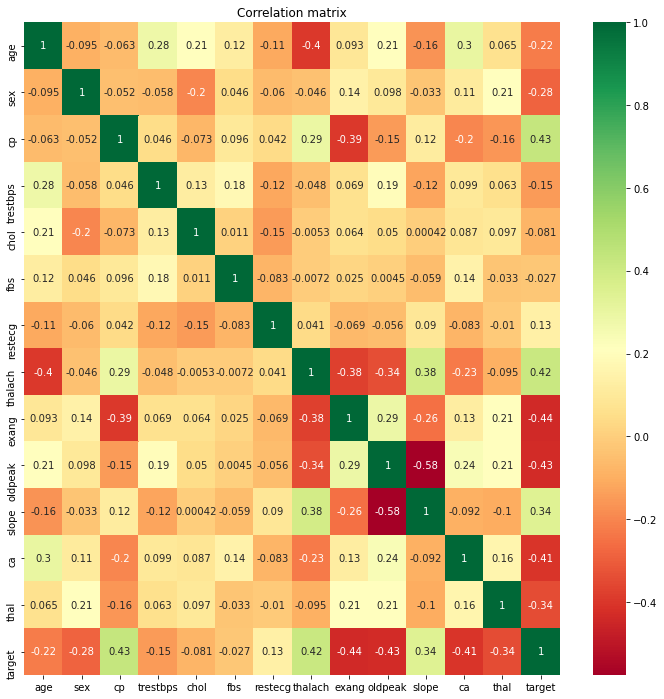

In [99]:
# compute correlation between each pair of variables in data frame
correlations = cleandata.corr()
#plot heat map
plt.figure(figsize=(12,12))
plt.title('Correlation matrix')
g=sns.heatmap(correlations,annot=True,cmap="RdYlGn")

 
#### target variable -  target (האם יש מחלת לב או לא)
#### predict variables - כולם חוץ מרמת סוכר בדם מעל ל120 ומדד כולסטרול. בחרנו במדדים שהקורלציה שלהם עם משתנה המטרה היא הגבוה ביותר והשמטנו את אלו שנראה שאין להם השפעה.

# C 

#### מאחר וכל הנתונים שלנו הם מספריים, בדקנו שאין לנו נתונים חסרים והורדנו את הכפילויות, ניתן להתחיל עם הסיווג

In [94]:
knn_df = cleandata[['thal', 'ca', 'slope', 'oldpeak', 'exang', 
                     'thalach', 'restecg', 'trestbps', 'cp', 'sex', 'age', 'target']]
display(knn_df)

,thal,ca,slope,oldpeak,exang,thalach,restecg,trestbps,cp,sex,age,target
0,3,2,2,1.0,0,168,1,125,0,1,52,0
1,3,0,0,3.1,1,155,0,140,0,1,53,0
2,3,0,0,2.6,1,125,1,145,0,1,70,0
3,3,1,2,0.0,0,161,1,148,0,1,61,0
4,2,3,1,1.9,0,106,1,138,0,0,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...
723,2,0,1,1.5,0,115,0,120,2,0,68,1
733,2,0,1,0.6,0,175,1,108,2,0,44,1
739,3,1,2,0.0,1,161,1,128,0,1,52,0
843,2,0,2,0.0,0,125,0,160,3,1,59,0


In [95]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#randomly shuffle the dataframe first
knn_df = knn_df.sample(frac=1)

# Split to X and Y
X = knn_df.loc[:, knn_df.columns != 'target'] # features
Y = knn_df.loc[:, 'target'].values # labels

# Split to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train

,thal,ca,slope,oldpeak,exang,thalach,restecg,trestbps,cp,sex,age
4,2,3,1,1.9,0,106,1,138,0,0,62
168,2,1,2,1.9,0,162,1,130,2,1,43
348,3,4,1,0.1,1,143,0,132,0,1,43
107,3,1,1,1.4,0,103,0,120,1,1,62
126,2,0,1,0.4,0,151,0,120,0,1,66
...,...,...,...,...,...,...,...,...,...,...,...
174,3,1,1,2.8,1,126,1,110,0,1,54
149,2,0,2,0.0,0,182,0,140,2,1,39
20,2,0,1,3.0,0,155,0,140,2,1,60
48,2,1,1,0.0,0,152,0,146,2,0,66


#### ננרמל את הנתונים 

In [96]:

from sklearn.preprocessing import StandardScaler
df_columns = X_train.columns
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
# note the difference between scaling the train and the test!
scaled_X_test = scaler.transform(X_test)

scaled_df = pd.DataFrame(scaled_X_train, columns=df_columns)
scaled_df.describe()

,thal,ca,slope,oldpeak,exang,thalach,restecg,trestbps,cp,sex,age
count,2.410000e+02,2.410000e+02,2.410000e+02,2.410000e+02,2.410000e+02,2.410000e+02,2.410000e+02,2.410000e+02,2.410000e+02,2.410000e+02,2.410000e+02
mean,1.976289e-16,-4.284263e-17,1.096403e-16,-8.306518e-17,-3.224714e-17,-5.661677e-16,-1.842694e-17,3.593253e-17,7.370775e-17,-5.896620e-17,-2.681120e-16
std,1.002081e+00,1.002081e+00,1.002081e+00,1.002081e+00,1.002081e+00,1.002081e+00,1.002081e+00,1.002081e+00,1.002081e+00,1.002081e+00,1.002081e+00
min,-3.636825e+00,-7.295811e-01,-2.237714e+00,-8.957192e-01,-6.721661e-01,-3.524389e+00,-1.057757e+00,-2.089935e+00,-9.246317e-01,-1.473449e+00,-2.804143e+00
25%,-4.554282e-01,-7.295811e-01,-6.326869e-01,-8.957192e-01,-6.721661e-01,-7.226299e-01,-1.057757e+00,-6.226485e-01,-9.246317e-01,-1.473449e+00,-6.998868e-01
50%,-4.554282e-01,-7.295811e-01,-6.326869e-01,-2.908039e-01,-6.721661e-01,1.668175e-01,8.589301e-01,-5.830744e-02,5.272023e-02,6.786796e-01,7.536536e-02
75%,1.135270e+00,2.694476e-01,9.723399e-01,4.869442e-01,1.487728e+00,7.894307e-01,8.589301e-01,5.060337e-01,1.030072e+00,6.786796e-01,7.398672e-01
max,1.135270e+00,3.266533e+00,9.723399e-01,4.462101e+00,1.487728e+00,2.301491e+00,2.775617e+00,3.892080e+00,2.007424e+00,6.786796e-01,2.511872e+00


Highest accuracy is obtained for k = 6 and equals 0.8588333333333333


Text(0.5, 1.0, 'Accuracy for k')

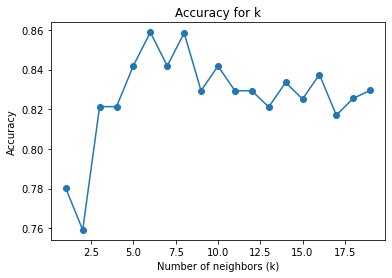

In [100]:
#run 10-fold CV to find optimal k - using only the training data
from sklearn.model_selection import cross_val_score

mean_cv_scores = []
k_list = range(1, 20)
for nn in k_list:
    knn_cv = KNeighborsClassifier(n_neighbors=nn)
    cv_scores = cross_val_score(knn_cv, scaled_X_train, Y_train, cv=10)
    mean_cv_scores.append(cv_scores.mean())
    
# output results
best_k = mean_cv_scores.index(max(mean_cv_scores))+1 # gets index of best performing k and adds 1
print('Highest accuracy is obtained for k =', best_k, 'and equals', max(mean_cv_scores))
plt.plot(k_list, mean_cv_scores, '-o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy');
plt.title('Accuracy for k')

In [98]:
# Last, we need to retrain our chosen kNN on the whole training data and test its accuracy on the test data
from sklearn.metrics import confusion_matrix
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)  
knn_classifier.fit(scaled_X_train, Y_train)
print('accuracy of the classifier is', knn_classifier.score(scaled_X_test, Y_test))

# Compute a confusion matrix
predictions = knn_classifier.predict(X=scaled_X_test) # get the classifier's predictions 
confusion_matrix(y_true=Y_test, y_pred=predictions, labels=[0, 1]) # rows are true values, columns are predicted values

accuracy of the classifier is 0.8032786885245902


array([[22,  3],
       [ 9, 27]], dtype=int64)